# EY Coding Challenge

## Contents
1. Exploratory Data Analysis
2. Feature Engineering
- 2.1 Missing Values and Imputation
- 2.2 Binning
- 2.3 Logarithmic Transformation
- 2.4 One-Hot Encoding
3. Benchmark Model for NN
- 3.1 Decision Tree Classifier
- 3.2 Random Forest Classifier
- 3.3 Gradient Boosting Classifier
- 3.4 Ada Boost Classifier
- 3.5 Final Benchmark Model for NN
4. TitaNet
- 4.1 Preprocessiing
- 4.2 TitanicDataset
- 4.3 TitaNet Architecture
- 4.4 Training the TitaNet
- 4.5 Testing the TitaNet

In [52]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# read the data
titanic_initial = pd.read_csv('./datasets/train.csv')
titanic_initial.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Exploratory Data Analysis

In [54]:
# dataset overview
titanic_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# dataset overview
titanic_initial.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


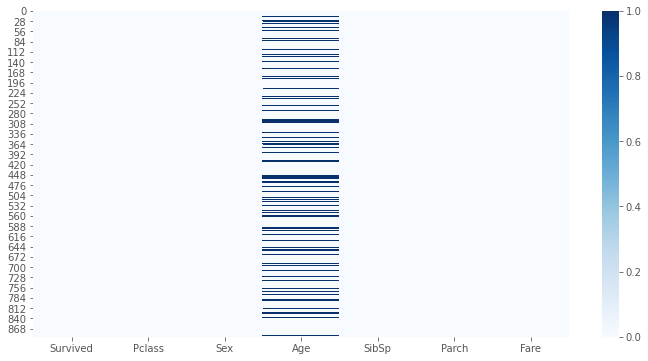

In [56]:
# drop columns that are irrelevent for 'Sex' prediction
titanic_initial.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'],
                      axis = 1, inplace = True)

# display the missing values in each column
def missing_values(df):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.heatmap(df.isnull(), cmap = 'Blues')
    plt.show()
    return fig

missing_values_fig = missing_values(titanic_initial)

<Figure size 432x288 with 0 Axes>

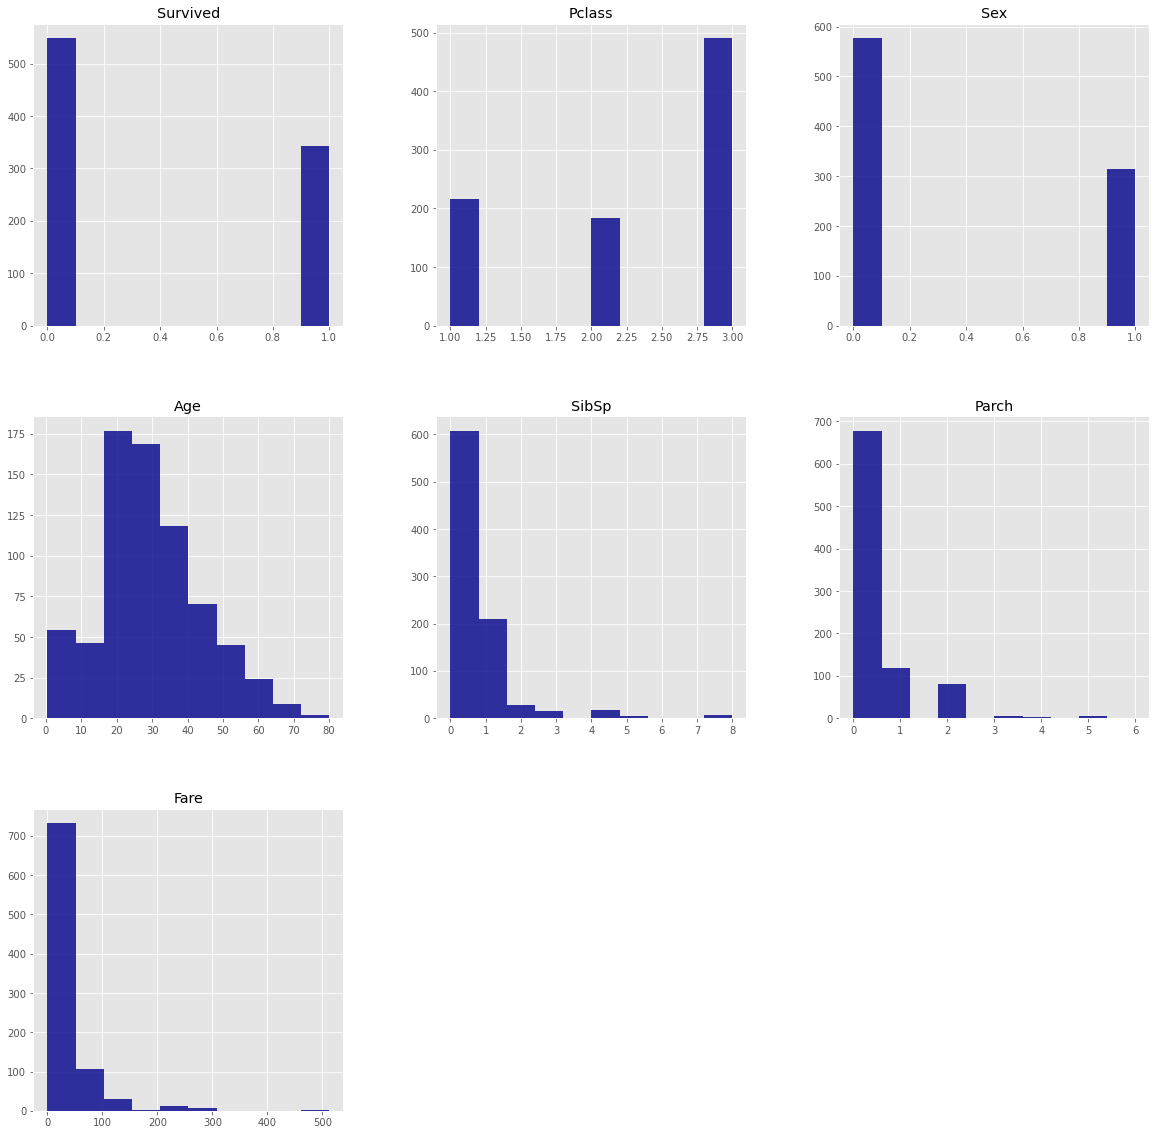

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [57]:
# convert male/female into 0/1
# define convert_sex function
def convert_sex(x):
    if x == 'male':
        return 0
    else:
        return 1
    
# apply the function
titanic_initial['Sex'] = titanic_initial['Sex'].apply(convert_sex)

# display the distribution of values to obtain wider picture about the dataset
plt.style.use('ggplot')
fig = plt.figure()
titanic_initial.hist(column = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                               'Fare'], figsize = (20, 20),
                     color = 'darkblue', alpha = 0.8)
plt.show()

# check the column adjustments of the dataset
titanic_initial.head()

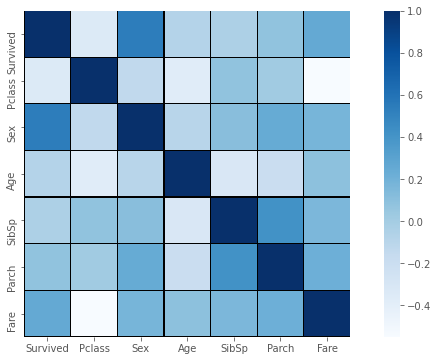

In [58]:
# display correlation matrix
corr_mat = titanic_initial.corr()

def correlation_matrix(mat):
    fig = plt.figure(figsize = (12, 6))
    sns.heatmap(mat, square = True, cmap = 'Blues', linecolor = 'black', linewidth = 0.25)
    plt.show()
    return fig

corr_mat_fig = correlation_matrix(corr_mat)

<Figure size 432x288 with 0 Axes>

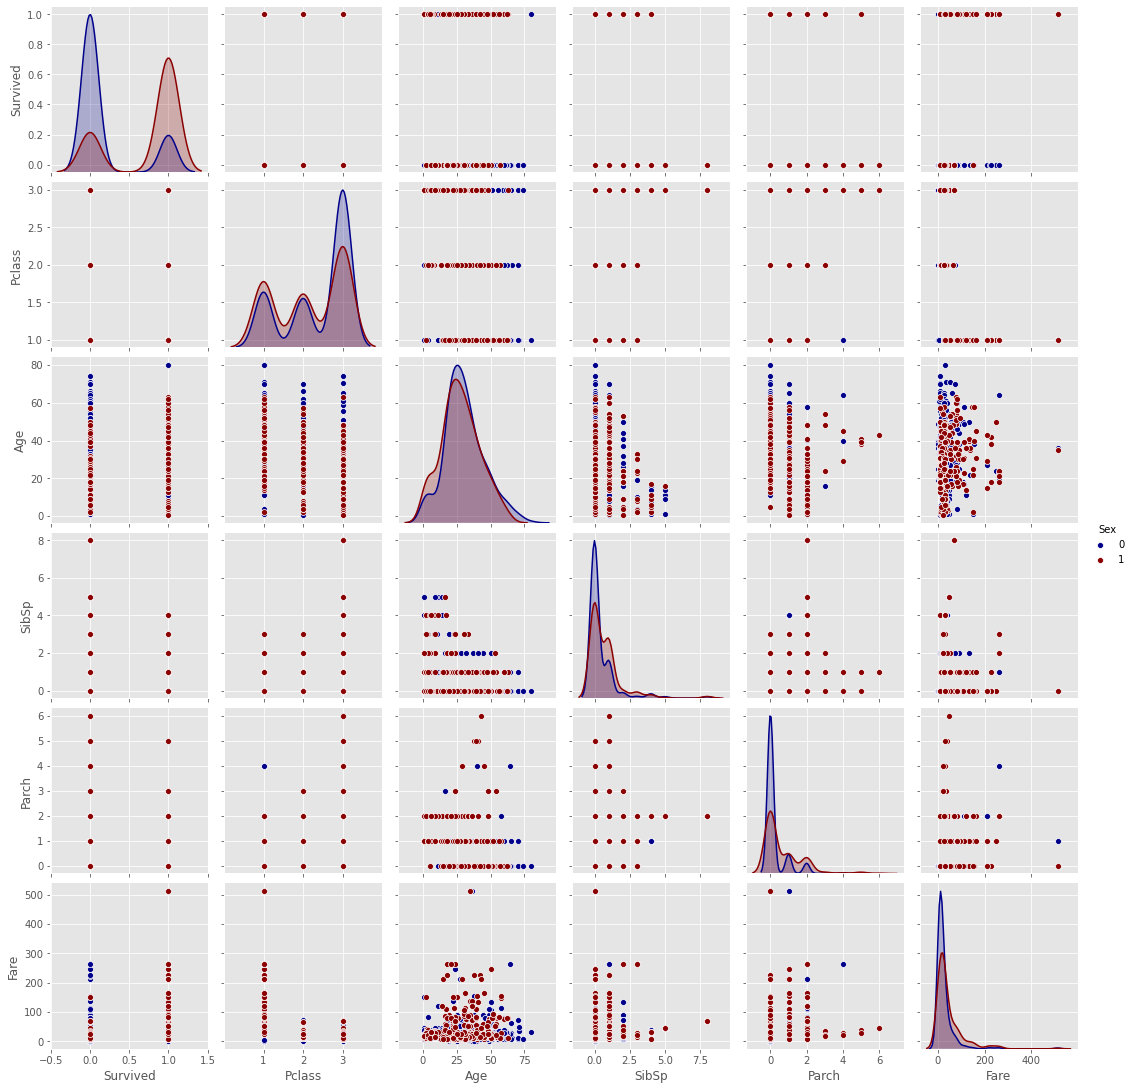

In [59]:
# display pairplot to get an insight about the relationships among variables 
def pairplot(hue_col, df):
    fig = plt.figure()
    sns.pairplot(data = df, hue = hue_col, palette = ['darkblue', 'darkred'])
    plt.show()
    return fig

pairplot_fig = pairplot('Sex', titanic_initial)

<Figure size 864x432 with 0 Axes>

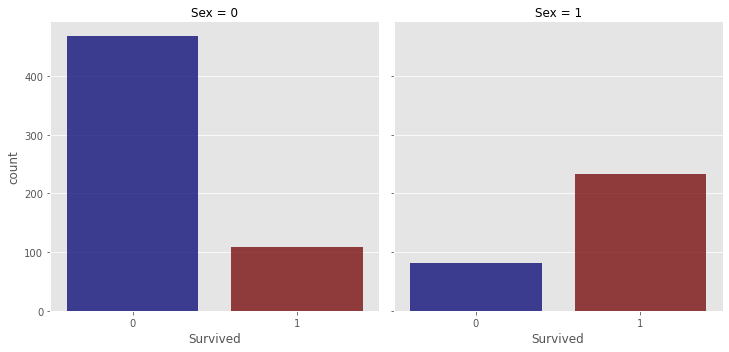

In [60]:
# display the amount of survived and deceased by gender
# 0 - deceased, 1 - survived
# 0 - male, 1 - female
def catplot(x_col, hue_col, df):
    fig = plt.figure(figsize = (12, 6))
    sns.catplot(x = x_col, col = hue_col, kind = 'count', data = df,
                palette = ['darkblue', 'darkred'], alpha = 0.8)
    plt.show()
    return fig

catplot_fig = catplot('Survived', 'Sex', titanic_initial)

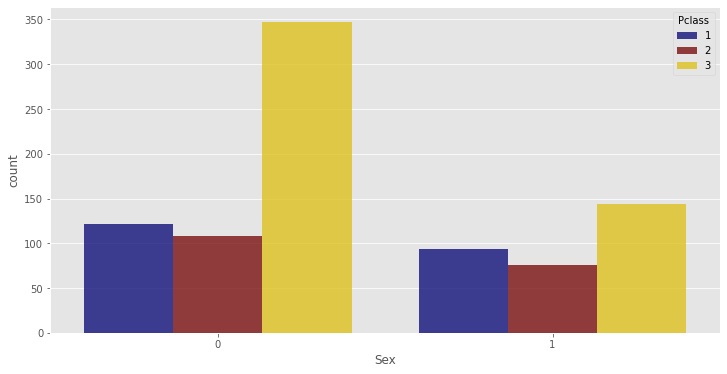

In [61]:
# display the passenger class by gender
# 0 - male, 1 - female
def countplot(x_col, hue_col, df):
    fig = plt.figure(figsize = (12, 6))
    sns.countplot(x = x_col, hue = hue_col, data = df,
                  palette = ['darkblue', 'darkred', 'gold'], alpha = 0.8)
    plt.show()
    return fig

countplot_fig = countplot('Sex', 'Pclass', titanic_initial)

## 2. Feature Engineering
### 2.1 Missing Values and Imputation
- if the age value is missing in female row, it will be filled with female median age
- if the age value is missing in male row, it will be filled with male median age

In [62]:
# compute mean values for both female/male
female_median_age = titanic_initial[titanic_initial['Sex'] == 1]['Age'].median()
male_median_age = titanic_initial[titanic_initial['Sex'] == 0]['Age'].median()

# filter the dataset with respect to female/male
titanic_female = titanic_initial[titanic_initial['Sex'] == 1]
titanic_male = titanic_initial[titanic_initial['Sex'] == 0]

# fillna in both subsets
titanic_female['Age'].fillna(female_median_age, inplace = True)
titanic_male['Age'].fillna(male_median_age, inplace = True)

# merge both datasets back together
titanic = titanic_female.append(titanic_male, ignore_index = True)

# put all rows in random order after appending
titanic = titanic.sample(frac = 1)

# check missing values again
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 438 to 696
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 55.7 KB


C:\Users\User\anaconda3\envs\datascience\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
# check the dataframe
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
438,0,3,0,36.0,0,0,7.8958
202,1,1,1,36.0,0,2,71.0000
194,1,1,1,44.0,0,1,57.9792
813,0,3,0,48.0,0,0,7.8542
283,1,2,1,31.0,1,1,26.2500
...,...,...,...,...,...,...,...
281,1,3,1,31.0,0,0,8.6833
294,1,1,1,27.0,1,0,89.1042
811,0,3,0,32.0,0,0,8.3625
502,0,2,0,36.0,0,0,12.8750


In [64]:
# round the 'Age' column to whole years
titanic['Age'] = titanic['Age'].round(0)

# check the dataframe
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
438,0,3,0,36.0,0,0,7.8958
202,1,1,1,36.0,0,2,71.0000
194,1,1,1,44.0,0,1,57.9792
813,0,3,0,48.0,0,0,7.8542
283,1,2,1,31.0,1,1,26.2500


### 2.2 Binning
- making the model more robust and preventing it from overfitting
- binning the 'Fare' column into categories
- bins with boundaries in amount of 20

In [65]:
# define binning function
def bin_fare(x):
    if x <= 20:
        return 1
    if x > 20 and x <= 40:
        return 2
    if x > 40 and x <= 60:
        return 3
    if x > 60 and x <= 80:
        return 4
    if x > 80 and x <= 100:
        return 5
    if x > 100 and x <= 120:
        return 6
    if x > 120 and x <= 140:
        return 7
    if x > 140 and x <= 160:
        return 8
    if x > 160 and x <= 180:
        return 9
    if x > 180 and x <= 200:
        return 10
    if x > 200 and x <= 220:
        return 11
    if x > 220 and x <= 240:
        return 12
    if x > 240 and x <= 260:
        return 13
    if x > 260 and x <= 280:
        return 14
    if x > 280 and x <= 300:
        return 15
    if x > 300 and x <= 320:
        return 16
    if x > 320 and x <= 340:
        return 17
    if x > 340 and x <= 360:
        return 18
    if x > 360 and x <= 380:
        return 19
    if x > 380 and x <= 400:
        return 20
    if x > 400 and x <= 420:
        return 21
    if x > 420 and x <= 440:
        return 22
    if x > 440 and x <= 460:
        return 23
    if x > 460 and x <= 480:
        return 24
    if x > 480 and x <= 500:
        return 25
    if x > 500:
        return 26
    
# apply the function
titanic['FareCategory'] = titanic['Fare'].apply(bin_fare)

# check the new column
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareCategory
438,0,3,0,36.0,0,0,7.8958,1
202,1,1,1,36.0,0,2,71.0000,4
194,1,1,1,44.0,0,1,57.9792,3
813,0,3,0,48.0,0,0,7.8542,1
283,1,2,1,31.0,1,1,26.2500,2


### 2.3 Logarithmic Transformation
- logarithmic transformation of 'Age' column

In [66]:
# logarithmic transformation of 'Age' column
titanic['LogTransformAge'] = (titanic['Age'] + 1).transform(np.log)

# check the new column
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareCategory,LogTransformAge
438,0,3,0,36.0,0,0,7.8958,1,3.610918
202,1,1,1,36.0,0,2,71.0000,4,3.610918
194,1,1,1,44.0,0,1,57.9792,3,3.806662
813,0,3,0,48.0,0,0,7.8542,1,3.891820
283,1,2,1,31.0,1,1,26.2500,2,3.465736


### 2.4 One-Hot Encoding
- One-Hot Encoding of 'Pclass' column

In [67]:
# define function to convert 'Pclass' column into categorical column
def Pclass_to_cat(x):
    if x == 1:
        return 'first'
    if x == 2:
        return 'second'
    if x == 3:
        return 'third'
    
# apply the function
titanic['Pclass'] = titanic['Pclass'].apply(Pclass_to_cat)

# check the adjustment
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareCategory,LogTransformAge
438,0,third,0,36.0,0,0,7.8958,1,3.610918
202,1,first,1,36.0,0,2,71.0000,4,3.610918
194,1,first,1,44.0,0,1,57.9792,3,3.806662
813,0,third,0,48.0,0,0,7.8542,1,3.891820
283,1,second,1,31.0,1,1,26.2500,2,3.465736


In [68]:
# define encoding function
def encode(dataframe, feature_to_encode):
    dummies = pd.get_dummies(dataframe[[feature_to_encode]])
    res = pd.concat([dataframe, dummies], axis = 1)
    return res

# apply the function
titanic_encoded = encode(titanic, 'Pclass')

# check the dataframe
titanic_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareCategory,LogTransformAge,Pclass_first,Pclass_second,Pclass_third
438,0,third,0,36.0,0,0,7.8958,1,3.610918,0,0,1
202,1,first,1,36.0,0,2,71.0000,4,3.610918,1,0,0
194,1,first,1,44.0,0,1,57.9792,3,3.806662,1,0,0
813,0,third,0,48.0,0,0,7.8542,1,3.891820,0,0,1
283,1,second,1,31.0,1,1,26.2500,2,3.465736,0,1,0


## 3. Benchmark Model for NN
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Ada Boost Classifier
- ---> FINAL BENCHMARK MODEL FOR NN

In [69]:
# imports
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve

# define learning curves plot function
def plot_learning_curves(estimator, title, X, y, ylim = None, cv = None, n_jobs = -1, train_sizes = np.linspace(0.1, 1.0, 10)):
    fig = plt.figure(figsize = (12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv = cv, n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-validation score')
    plt.legend(loc = 'best')
    plt.show()
    return fig

In [70]:
# create helper list
feature_cols = ['Survived', 'Pclass_first', 'Pclass_second', 'Pclass_third',
                'LogTransformAge', 'SibSp', 'Parch', 'FareCategory', 'Fare']

# split the dataset into features and target variable
X = titanic_encoded[feature_cols] # features
y = titanic_encoded['Sex'] # target variable

# import train_test_split
from sklearn.model_selection import train_test_split

# divide the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 3.1 Decision Tree Classifier

In [71]:
# imports
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# create a decision tree classifier
clf_tree = DecisionTreeClassifier()

# grid search for the best hyper-parameters (k-fold CV = 4)
tree_params = {'criterion':['gini', 'entropy'],
               'max_features':['auto','sqrt', 'log2'],
               'random_state':[1], 'min_samples_split':range(3,12),
               'min_samples_leaf':range(3, 12)}

clf_tree_cv = GridSearchCV(estimator = clf_tree, param_grid = tree_params, cv = 4)

# train the classifier
clf_tree_cv = clf_tree_cv.fit(X_train, y_train)

# predict the output
y_pred_tree = clf_tree_cv.predict(X_test)

# model accuracy
print('Decision Tree Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_tree)))

Decision Tree Accuracy: 84.36%


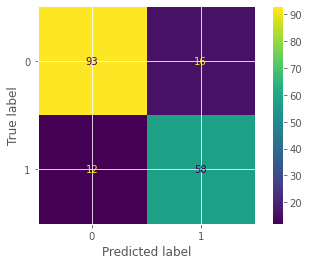

In [72]:
# confusion matrix
plot_confusion_matrix(clf_tree_cv, X_test, y_test)
plt.show()

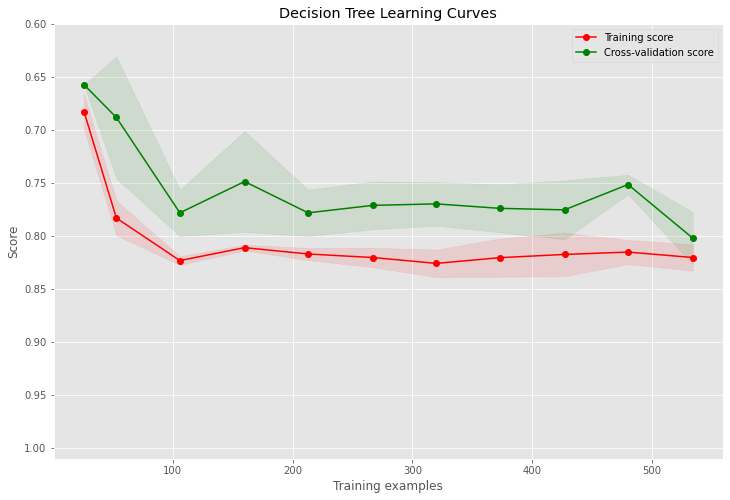

In [73]:
# plot the learning curves
learning_curves_tree = plot_learning_curves(clf_tree_cv.best_estimator_, 'Decision Tree Learning Curves', X_train, y_train, ylim = [1.01, 0.6], cv = 4, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 3.2 Random Forest Classifier

In [74]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# craete a Random Forest Classifier
clf_forest = RandomForestClassifier()

# grid search for the best hyper-parameters
forest_params = [{'criterion':['entropy', 'gini'], 'n_estimators':[20, 40, 60, 80, 100],
               'max_features':['sqrt', 'log2']}]

clf_forest_cv = GridSearchCV(estimator = clf_forest, param_grid = forest_params, cv = 4)

# train the classifier
clf_forest_cv = clf_forest_cv.fit(X_train, y_train)

# predict the output
y_pred_forest = clf_forest_cv.predict(X_test)

# model accuracy
print('Random Forest Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_forest)))

Random Forest Accuracy: 84.92%


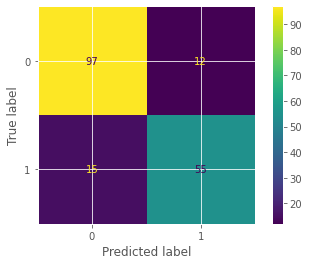

In [75]:
# confusion matrix
plot_confusion_matrix(clf_forest_cv, X_test, y_test)
plt.show()

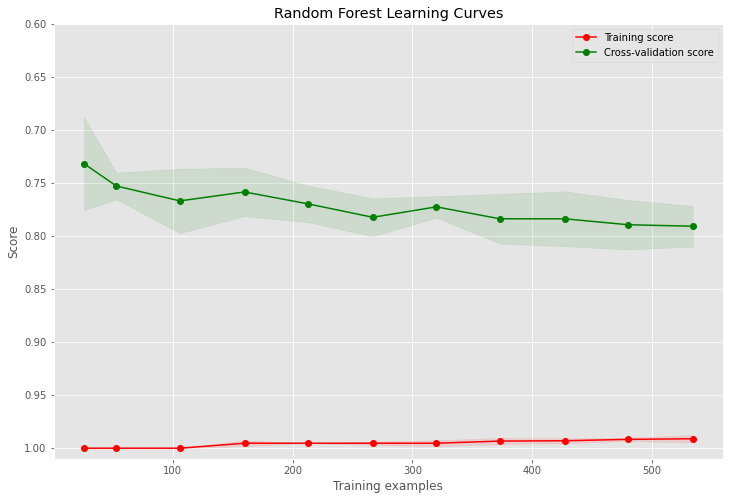

In [76]:
# plot the learning curves
learning_curves_forest = plot_learning_curves(clf_forest_cv.best_estimator_, 'Random Forest Learning Curves', X_train, y_train, ylim = [1.01, 0.6], cv = 4, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 3.3 Gradient Boosting Classifier

In [77]:
# import gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# create gradient boosting classifier
clf_gbc = GradientBoostingClassifier()

# grid search for the best hyper-parameters
gbc_params = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
               'loss':['deviance', 'exponential'], 'learning_rate':[0.1, 0.01, 0.001],
               'criterion':['friedman_mse', 'mse', 'mae']}]

clf_gbc_cv = GridSearchCV(estimator = clf_gbc, param_grid = gbc_params, cv = 4)

# train the classifier
clf_gbc_cv = clf_gbc_cv.fit(X_train, y_train)

# predict the output
y_pred_gbc = clf_gbc_cv.predict(X_test)

# model accuracy
print('GBC Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_gbc)))

GBC Accuracy: 86.03%


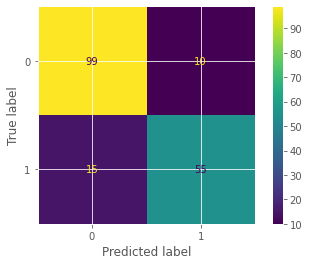

In [78]:
# confusion matrix
plot_confusion_matrix(clf_gbc_cv, X_test, y_test)
plt.show()

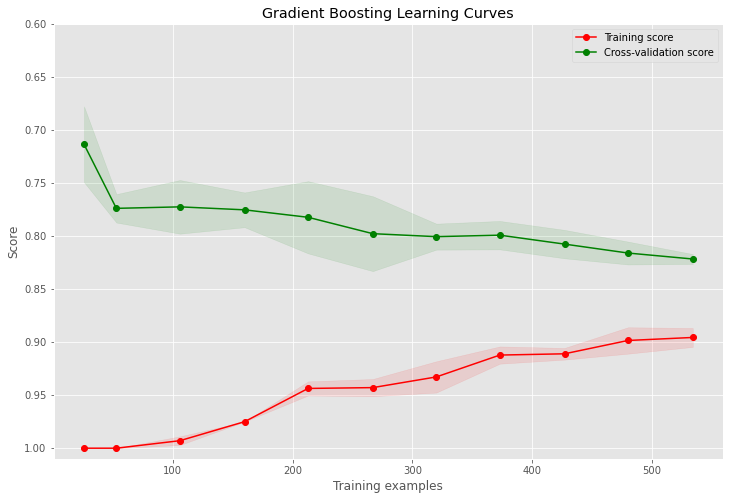

In [79]:
# plot the learning curves
learning_curves_gbc = plot_learning_curves(clf_gbc_cv.best_estimator_, 'Gradient Boosting Learning Curves', X_train, y_train, ylim = [1.01, 0.6], cv = 4, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 3.4 Ada Boost Classifier

In [80]:
# import Support Vector Classifier
from sklearn.ensemble import AdaBoostClassifier

# create Ada Boost Classifier
clf_ada = AdaBoostClassifier()

# grid search for best hyper-parameters
ada_params = [{'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

clf_ada_cv = GridSearchCV(estimator = clf_ada, param_grid = ada_params, cv = 4)

# train the classifier
clf_ada_cv = clf_ada_cv.fit(X_train, y_train)

# predict the output
y_pred_ada = clf_ada_cv.predict(X_test)

# model accuracy
print('ADA Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_ada)))

ADA Accuracy: 81.01%


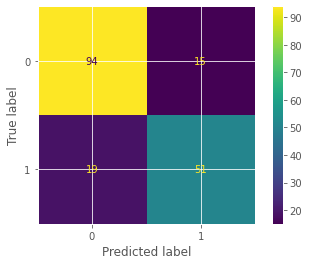

In [81]:
# confusion matrix
plot_confusion_matrix(clf_ada_cv, X_test, y_test)
plt.show()

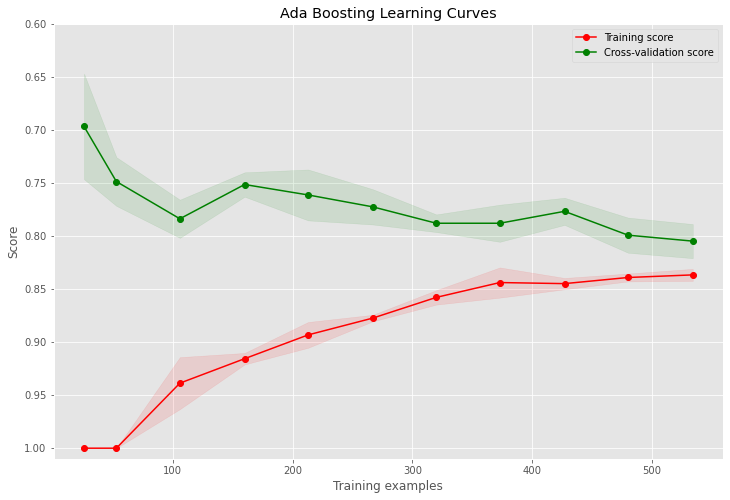

In [82]:
# plot the learning curves
learning_curves_ada = plot_learning_curves(clf_ada_cv.best_estimator_, 'Ada Boosting Learning Curves', X_train, y_train, ylim = [1.01, 0.6], cv = 4, train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### 3.5 Final Benchmark Model for NN

In [83]:
rfc_best = RandomForestClassifier(**clf_forest_cv.best_params_)
gbc_best = GradientBoostingClassifier(**clf_gbc_cv.best_params_)
dtc_best = DecisionTreeClassifier(**clf_tree_cv.best_params_)
ada_best = AdaBoostClassifier(**clf_ada_cv.best_params_)

In [84]:
# imports
from sklearn.ensemble import VotingClassifier

# create Voting Classifier
clf_final = VotingClassifier(estimators = [('rfc', rfc_best), ('gbc', gbc_best),
                                            ('dtc', dtc_best), ('ada', ada_best)],
                             voting = 'hard')

# train the classifier
clf_final = clf_final.fit(X_train, y_train)

# predict the output
y_pred_final = clf_final.predict(X_test)

# model accuracy
print('Final Classifier Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred_final)))

Final Classifier Accuracy: 85.47%


In [85]:
# imports
from sklearn.model_selection import cross_val_score

# cross validation score
print('Cross Validation Score in each Fold:')
print(cross_val_score(clf_final, X_train, y_train, cv = 4).round(4) * 100, '%')

Cross Validation Score in each Fold:
[80.34 82.02 80.34 81.46] %


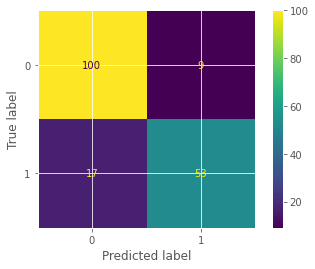

In [86]:
# confusion matrix
plot_confusion_matrix(clf_final, X_test, y_test)
plt.show()

## 4. TitaNet

### 4.1 Preprocessing

In [87]:
# imports
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import Dataset, DataLoader

In [88]:
# dataset
titanic_dataset = titanic_encoded.copy(deep = True)
titanic_dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FareCategory,LogTransformAge,Pclass_first,Pclass_second,Pclass_third
438,0,third,0,36.0,0,0,7.8958,1,3.610918,0,0,1
202,1,first,1,36.0,0,2,71.0000,4,3.610918,1,0,0
194,1,first,1,44.0,0,1,57.9792,3,3.806662,1,0,0
813,0,third,0,48.0,0,0,7.8542,1,3.891820,0,0,1
283,1,second,1,31.0,1,1,26.2500,2,3.465736,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,third,1,31.0,0,0,8.6833,1,3.465736,0,0,1
294,1,first,1,27.0,1,0,89.1042,5,3.332205,1,0,0
811,0,third,0,32.0,0,0,8.3625,1,3.496508,0,0,1
502,0,second,0,36.0,0,0,12.8750,1,3.610918,0,1,0


In [89]:
# categorical columns
categorical_cols = ['Survived', 'Pclass', 'Sex', 'FareCategory', 'Pclass_first',
                    'Pclass_second', 'Pclass_third']

# numerical (continuous) columns
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

# keep only relevant columns
titanic_dataset = titanic_dataset.loc[:, ['Survived', 'Pclass', 'Sex', 'FareCategory',
                                   'Pclass_first', 'Pclass_second',
                                    'Pclass_third', 'Age', 'SibSp', 'Parch', 'Fare']]

In [90]:
# categorical columns as type 'category' and label encoding
for col in titanic_dataset.columns:
    if col in categorical_cols:
        titanic_dataset[col] = LabelEncoder().fit_transform(titanic_dataset[col])
        titanic_dataset[col] = titanic_dataset[col].astype('category')

In [91]:
# normaliziation 
from pandas.api.types import is_numeric_dtype

# compute the means and stds of numerical columns to normalize
def normalize(df):
    means, stds = {}, {}
    num_names = ['Age', 'SibSp', 'Parch', 'Fare']
    for name in num_names:
        means[name], stds[name] = df[name].mean(), df[name].std()
        df[name] = (df[name] - means[name]) / (1e-7 + stds[name])
        
normalize(titanic_dataset)
titanic_dataset

,Survived,Pclass,Sex,FareCategory,Pclass_first,Pclass_second,Pclass_third,Age,SibSp,Parch,Fare
438,0,2,0,0,0,0,1,0.504223,-0.474279,-0.473408,-0.489167
202,1,0,1,3,1,0,0,0.504223,-0.474279,2.007805,0.780703
194,1,0,1,2,1,0,0,1.118809,-0.474279,0.767199,0.518680
813,0,2,0,0,0,0,1,1.426102,-0.474279,-0.473408,-0.490005
283,1,1,1,1,0,1,0,0.120106,0.432550,0.767199,-0.119819
...,...,...,...,...,...,...,...,...,...,...,...
281,1,2,1,0,0,0,1,0.120106,-0.474279,-0.473408,-0.473320
294,1,0,1,4,1,0,0,-0.187187,0.432550,-0.473408,1.145020
811,0,2,0,0,0,0,1,0.196930,-0.474279,-0.473408,-0.479776
502,0,1,0,0,0,1,0,0.504223,-0.474279,-0.473408,-0.388969


In [92]:
# create input and output data
X = titanic_dataset.loc[:, ['Survived', 'Pclass', 'FareCategory', 'Pclass_first',
                         'Pclass_second','Pclass_third', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_dataset.loc[:, 'Sex']
X

,Survived,Pclass,FareCategory,Pclass_first,Pclass_second,Pclass_third,Age,SibSp,Parch,Fare
438,0,2,0,0,0,1,0.504223,-0.474279,-0.473408,-0.489167
202,1,0,3,1,0,0,0.504223,-0.474279,2.007805,0.780703
194,1,0,2,1,0,0,1.118809,-0.474279,0.767199,0.518680
813,0,2,0,0,0,1,1.426102,-0.474279,-0.473408,-0.490005
283,1,1,1,0,1,0,0.120106,0.432550,0.767199,-0.119819
...,...,...,...,...,...,...,...,...,...,...
281,1,2,0,0,0,1,0.120106,-0.474279,-0.473408,-0.473320
294,1,0,4,1,0,0,-0.187187,0.432550,-0.473408,1.145020
811,0,2,0,0,0,1,0.196930,-0.474279,-0.473408,-0.479776
502,0,1,0,0,1,0,0.504223,-0.474279,-0.473408,-0.388969


In [93]:
# training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 4.2 TitanicDataset

In [94]:
# train TitanicDataset
class train_TitanicDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, idx):
        return self.X_data[idx], self.y_data[idx]
    def __len__(self):
        return len(self.X_data)
    
train_data = train_TitanicDataset(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))

# test TitanicDataset
class test_TitanicDataset(Dataset):
    def __init__(self, X_data):
        self.X_data = X_data
    def __getitem__(self, idx):
        return self.X_data[idx]
    def __len__(self):
        return len(self.X_data)
    
test_data = test_TitanicDataset(torch.FloatTensor(X_test.values))

In [95]:
# train and test loader
train_loader = DataLoader(dataset = train_data, batch_size = 64)
test_loader = DataLoader(dataset = test_data, batch_size = 1)

### 4.3 TitaNet Architecture

In [96]:
# input, hidden and output sizes
input_size = 10
hidden1_size = 64
hidden2_size = 64
output_size = 1

class TitaNet(nn.Module):
    def __init__(self):
        super(TitaNet, self).__init__()
        
        self.input_layer = nn.Linear(input_size, hidden1_size)
        self.hidden1_layer = nn.Linear(hidden1_size, hidden2_size)
        self.hidden2_layer = nn.Linear(hidden2_size, output_size)
        
        self.act1 = nn.ReLU()
        self.act2 = nn.Dropout(p = 0.1)
        self.act3 = nn.BatchNorm1d(64)
        self.act4 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.act1(self.input_layer(inputs))
        x = self.act3(x)
        
        x = self.act1(self.hidden1_layer(x))
        x = self.act4(x)
        
        x = self.act2(x)
        x = self.hidden2_layer(x)
        
        return x

In [97]:
# initialize and print the model
model = TitaNet()
print(model)

TitaNet(
  (input_layer): Linear(in_features=10, out_features=64, bias=True)
  (hidden1_layer): Linear(in_features=64, out_features=64, bias=True)
  (hidden2_layer): Linear(in_features=64, out_features=1, bias=True)
  (act1): ReLU()
  (act2): Dropout(p=0.1, inplace=False)
  (act3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [98]:
# define accuracy function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_sum / y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

### 4.4 Training the TitaNet

In [99]:
# training the model
num_epochs = 1000
learning_rate = 0.001
model.train()
optimizer = Adam(model.parameters(), lr = learning_rate)
criterion = BCEWithLogitsLoss()

for epoch in range(1, num_epochs + 1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        if epoch % 200 == 0:
            print('Epoch: {} | Loss: {:.5f} | Accuracy: {:.2f}'.format(epoch, epoch_loss / len(train_loader),
                                                                   epoch_acc / len(train_loader)))

Epoch: 200 | Loss: 0.00940 | Accuracy: 7.92
Epoch: 200 | Loss: 0.01754 | Accuracy: 15.83
Epoch: 200 | Loss: 0.03843 | Accuracy: 23.50
Epoch: 200 | Loss: 0.04293 | Accuracy: 31.67
Epoch: 200 | Loss: 0.04758 | Accuracy: 39.75
Epoch: 200 | Loss: 0.06495 | Accuracy: 47.17
Epoch: 200 | Loss: 0.07903 | Accuracy: 55.00
Epoch: 200 | Loss: 0.09045 | Accuracy: 62.83
Epoch: 200 | Loss: 0.09919 | Accuracy: 70.92
Epoch: 200 | Loss: 0.11221 | Accuracy: 78.50
Epoch: 200 | Loss: 0.11996 | Accuracy: 86.58
Epoch: 200 | Loss: 0.12001 | Accuracy: 94.92
Epoch: 400 | Loss: 0.00501 | Accuracy: 8.17
Epoch: 400 | Loss: 0.00681 | Accuracy: 16.50
Epoch: 400 | Loss: 0.01131 | Accuracy: 24.58
Epoch: 400 | Loss: 0.01624 | Accuracy: 32.67
Epoch: 400 | Loss: 0.02403 | Accuracy: 40.58
Epoch: 400 | Loss: 0.04370 | Accuracy: 47.92
Epoch: 400 | Loss: 0.04813 | Accuracy: 56.00
Epoch: 400 | Loss: 0.05523 | Accuracy: 64.08
Epoch: 400 | Loss: 0.06210 | Accuracy: 72.17
Epoch: 400 | Loss: 0.07409 | Accuracy: 80.08
Epoch: 400 |

### 4.5 Testitng the TitaNet 

In [100]:
y_pred_list = []
model.eval()

with torch.no_grad():
    for X_batch in test_loader:
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())
        
y_pred_list = [el.squeeze().tolist() for el in y_pred_list]

In [101]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_list)

array([[88, 21],
       [18, 52]], dtype=int64)

In [102]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.71      0.74      0.73        70

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179

